This activity that compares a standard LinearRegression model with Ridge regression models using low and high penalty (alpha) values on a synthetic polynomial dataset. This example visualizes how the model complexity and coefficients change with regularization strength:

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

In [3]:
# Generate synthetic polynomial data
np.random.seed(0)
n_samples = 30
X = np.sort(np.random.rand(n_samples) * 10).reshape(-1, 1)
# True function is cubic plus noise
y = 0.5 * X**3 - X**2 + 2 * X + 3 + np.random.randn(n_samples, 1) * 10

In [4]:
# Prepare polynomial features (degree 3)
degree = 3
poly = PolynomialFeatures(degree)
X_poly = poly.fit_transform(X)

In [5]:
# Fit Linear Regression (no regularization)
lr = LinearRegression()
lr.fit(X_poly, y)
y_pred_lr = lr.predict(X_poly)

In [6]:
# Fit Ridge Regression with low alpha (weak penalty)
ridge_low = Ridge(alpha=0.1)
ridge_low.fit(X_poly, y)
y_pred_ridge_low = ridge_low.predict(X_poly)

In [7]:
# Fit Ridge Regression with high alpha (strong penalty)
ridge_high = Ridge(alpha=100)
ridge_high.fit(X_poly, y)
y_pred_ridge_high = ridge_high.predict(X_poly)

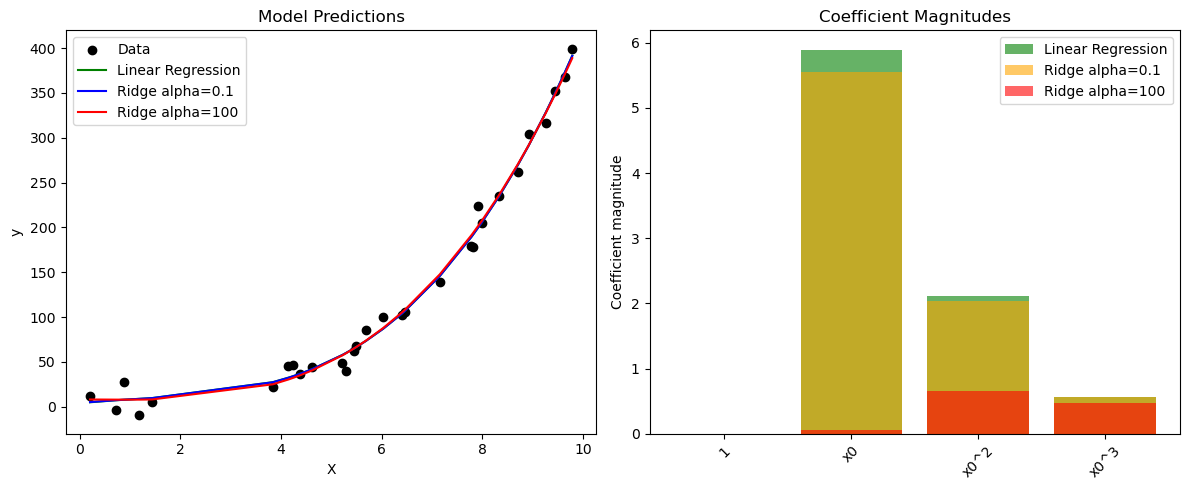

In [10]:
# Plotting the results and coefficients
plt.figure(figsize=(12, 5))

# Plot data and predictions
plt.subplot(1, 2, 1)
plt.scatter(X, y, color='black', label='Data')
plt.plot(X, y_pred_lr, label='Linear Regression', color='green')
plt.plot(X, y_pred_ridge_low, label='Ridge alpha=0.1', color='blue')
plt.plot(X, y_pred_ridge_high, label='Ridge alpha=100', color='red')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Model Predictions')
plt.legend()

# Plot coefficient magnitudes
plt.subplot(1, 2, 2)
coef_names = poly.get_feature_names_out()
plt.bar(coef_names, np.abs(lr.coef_).flatten(), alpha=0.6, label='Linear Regression', color='green')
plt.bar(coef_names, np.abs(ridge_low.coef_).flatten(), alpha=0.6, label='Ridge alpha=0.1', color='orange')
plt.bar(coef_names, np.abs(ridge_high.coef_).flatten(), alpha=0.6, label='Ridge alpha=100', color='red')
plt.xticks(rotation=45)
plt.ylabel('Coefficient magnitude')
plt.title('Coefficient Magnitudes')
plt.legend()

plt.tight_layout()
plt.show()

In [9]:
# Print coefficients for clarity
print("Coefficients for Linear Regression:")
print(dict(zip(coef_names, lr.coef_.flatten())))
print("\nCoefficients for Ridge Regression (alpha=0.1):")
print(dict(zip(coef_names, ridge_low.coef_.flatten())))
print("\nCoefficients for Ridge Regression (alpha=100):")
print(dict(zip(coef_names, ridge_high.coef_.flatten())))

Coefficients for Linear Regression:
{'1': np.float64(0.0), 'x0': np.float64(5.896060547835145), 'x0^2': np.float64(-2.115182426279144), 'x0^3': np.float64(0.5681326870892951)}

Coefficients for Ridge Regression (alpha=0.1):
{'1': np.float64(0.0), 'x0': np.float64(5.553661070554696), 'x0^2': np.float64(-2.0361922734692), 'x0^3': np.float64(0.5631986064777932)}

Coefficients for Ridge Regression (alpha=100):
{'1': np.float64(0.0), 'x0': np.float64(-0.05241793637119859), 'x0^2': np.float64(-0.6541999156875425), 'x0^3': np.float64(0.47353769493408826)}


### Explanation:
- We generate a noisy cubic polynomial dataset.
- We transform input features polynomially (degree 3) to allow modeling nonlinear relationships.
- Three models are trained on the same data:
  - LinearRegression: no regularization, coefficients can become large and overfit the data.
  - Ridge with low alpha (0.1): gently shrinks coefficients but still fits the data well.
  - Ridge with high alpha (100): heavily shrinks coefficients, producing a simpler model with less variance.
- The left plot shows model fits on data: LinearRegression and Ridge with low alpha closely fit the data, while Ridge with high alpha is smoother.
- The right plot displays coefficient magnitudes, showing how larger regularization drastically reduces coefficient sizes and therefore model complexity.
- The printed coefficients clarify the effect of increasing alpha by shrinking model weights.

This activity concretely demonstrates how regularization controls complexity and reduces overfitting by penalizing large coefficients, affecting the model shape and the importance of features. 

Sources:
[1](https://www.geeksforgeeks.org/machine-learning/ml-ridge-regressor-using-sklearn/)
[2](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ridge_regression.html)
[3](https://www.youtube.com/watch?v=mpuKSovz9xM)
[4](https://www.datacamp.com/tutorial/tutorial-lasso-ridge-regression)
[5](https://www.pluralsight.com/resources/blog/guides/linear-lasso-ridge-regression-scikit-learn)
[6](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html)
[7](https://www.youtube.com/watch?v=GMF4Td7KtB0)
[8](https://www.tutorialspoint.com/scikit_learn/scikit_learn_ridge_regression.htm)
[9](https://www.reddit.com/r/learnpython/comments/15ak2rk/scikitlearn_ridge_regression_choosing_infinitely/)
[10](https://github.com/scikit-learn/scikit-learn/issues/13128)